In [ ]:
!pip install imbalanced-learn scikit-learn


In [ ]:
import pandas as pd


# Load the dataset
df = pd.read_csv("creditcard.csv")

# Display first few rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("Class Distribution:\n", df['Class'].value_counts())


Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


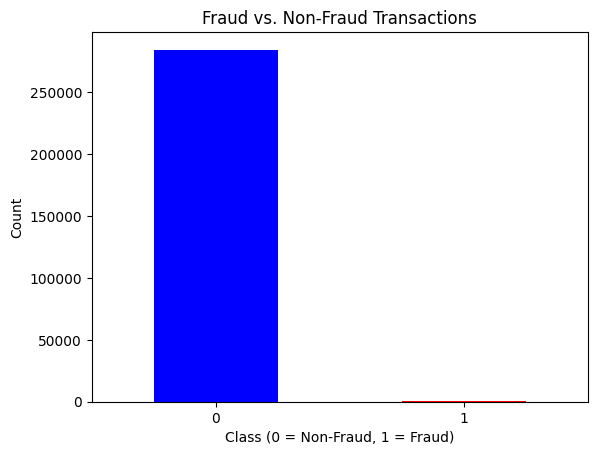

In [ ]:
import matplotlib.pyplot as plt

df['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Fraud vs. Non-Fraud Transactions")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


# **preprocessing**


In [ ]:
df.info()  # Shows column names, data types, and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
print("Duplicate Rows:", df.duplicated().sum())


Duplicate Rows: 1081


In [ ]:
df.drop_duplicates(inplace=True)


# **Splitting Data for Training & Testing**

**split the data in the spreadsheet in to 60% training and 40% validation**

In [ ]:
# Define Features (X) and Target (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable


In [ ]:
from sklearn.model_selection import train_test_split

# 1️⃣ Step 1: Split 60% for development, 40% for final testing
X_working, X_holdout, y_working, y_holdout = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# 2️⃣ Step 2: Now split that 60% into 70% train, 30% dev test
X_train, X_dev_test, y_train, y_dev_test = train_test_split(
    X_working, y_working, test_size=0.3, random_state=42, stratify=y_working
)

# Print results
print(f"Working Data (60% of full): {X_working.shape[0]} rows")
print(f"Training Set (70% of working): {X_train.shape[0]} rows")
print(f"Development Test Set (30% of working): {X_dev_test.shape[0]} rows")
print(f"Holdout Final Test Set (40% of full): {X_holdout.shape[0]} rows")


Working Data (60% of full): 170884 rows
Training Set (70% of working): 119618 rows
Development Test Set (30% of working): 51266 rows
Holdout Final Test Set (40% of full): 113923 rows


Check Class Balance in Training Data

In [ ]:
print("Training Class Distribution:\n", y_train.value_counts(normalize=True) * 100)


Training Class Distribution:
 Class
0    99.827785
1     0.172215
Name: proportion, dtype: float64


since the fraud transactions count less than 5% we need to apply the smote oversampling before training

In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter


In [ ]:
# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Make fraud cases 50% of non-fraud cases
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print class distributions before and after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))


Before SMOTE: Counter({0: 119412, 1: 206})
After SMOTE: Counter({0: 119412, 1: 59706})


<ipython-input-10-69d0caf0da16>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(Counter(y_train_smote).keys()), y=list(Counter(y_train_smote).values()), palette=["blue", "red"])


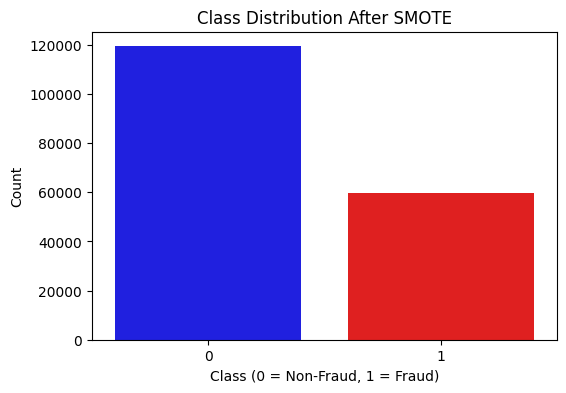

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=list(Counter(y_train_smote).keys()), y=list(Counter(y_train_smote).values()), palette=["blue", "red"])
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


# **Train LightGBM**

In [ ]:
!pip install lightgbm


In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
# Define the parameter grid
param_grid = {
    'num_leaves': [20, 31, 40, 50, 60],  # Controls model complexity
    'max_depth': [-1, 5, 10, 15],  # Tree depth (-1 means unlimited)
    'learning_rate': [0.001, 0.01, 0.05, 0.1],  # Smaller = more precise but slower
    'n_estimators': [100, 200, 300, 500],  # Number of trees
    'min_child_samples': [10, 20, 30],  # Minimum samples per leaf
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Random data selection for boosting
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Feature selection per tree
    'reg_alpha': [0, 0.1, 0.5, 1.0],  # L1 regularization
    'reg_lambda': [0, 0.1, 0.5, 1.0]  # L2 regularization
}


In [ ]:
# Initialize LightGBM model
lgbm_model = lgb.LGBMClassifier(random_state=42)

# Perform Randomized Search with 5-fold Cross-Validation
random_search = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of combinations to try
    scoring='recall',  # Optimizing for recall to detect more fraud cases
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit RandomizedSearchCV on the SMOTE-balanced training set
random_search.fit(X_train_smote, y_train_smote)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 113301, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.111747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 339903, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
Best Hyperparameters: {'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'num_leaves': 20, 'n_estimators': 200, 'min_child_samples': 30, 'max_depth': 15, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


**after training the model this are the best parameter found using random search**

In [ ]:

best_params = {
    'subsample': 0.9,
    'reg_lambda': 0.1,
    'reg_alpha': 0.5,
    'num_leaves': 20,
    'n_estimators': 200,
    'min_child_samples': 30,
    'max_depth': 15,
    'learning_rate': 0.1,
    'colsample_bytree': 0.8
}


In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create and train optimized model
optimized_lgbm = lgb.LGBMClassifier(**best_params, random_state=42)
optimized_lgbm.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_optimized = optimized_lgbm.predict(X_dev_test)

# Evaluate the model
accuracy = accuracy_score(y_dev_test, y_pred_optimized)
precision = precision_score(y_dev_test, y_pred_optimized)
recall = recall_score(y_dev_test, y_pred_optimized)
f1 = f1_score(y_dev_test, y_pred_optimized)

# Print results
print("✅ Final Evaluation Results:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Optional: detailed classification report
print("\n📊 Classification Report:\n", classification_report(y_dev_test, y_pred_optimized))


[LightGBM] [Info] Number of positive: 59706, number of negative: 119412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 179118, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
✅ Final Evaluation Results:
Accuracy:  0.9993
Precision: 0.7755
Recall:    0.8539
F1 Score:  0.8128

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     51177
           1       0.78      0.85      0.81        89

    accuracy                           1.00     51266
   macro avg       0.89      0.93      0.91     51266
weighted avg       1.00      1.00      1.00     51266



# **VALIDATION SET**

In [ ]:
# Predict on the holdout (final test) set
y_pred_holdout = optimized_lgbm.predict(X_holdout)

# Import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate
accuracy = accuracy_score(y_holdout, y_pred_holdout)
precision = precision_score(y_holdout, y_pred_holdout)
recall = recall_score(y_holdout, y_pred_holdout)
f1 = f1_score(y_holdout, y_pred_holdout)

# Display results
print("📊 Final Evaluation on Holdout Set:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Classification Report
print("\n📋 Classification Report:\n", classification_report(y_holdout, y_pred_holdout))


📊 Final Evaluation on Holdout Set:
Accuracy:  0.9992
Precision: 0.7397
Recall:    0.8223
F1 Score:  0.7788

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113726
           1       0.74      0.82      0.78       197

    accuracy                           1.00    113923
   macro avg       0.87      0.91      0.89    113923
weighted avg       1.00      1.00      1.00    113923



In [ ]:
import joblib
joblib.dump(optimized_lgbm, 'lightgbm_fraud_model.pkl')


['lightgbm_fraud_model.pkl']